In [1]:
import cv2
import numpy as np
from math import sqrt,exp
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6.4*2, 4.8*2]

# Fast Fourier Transformation

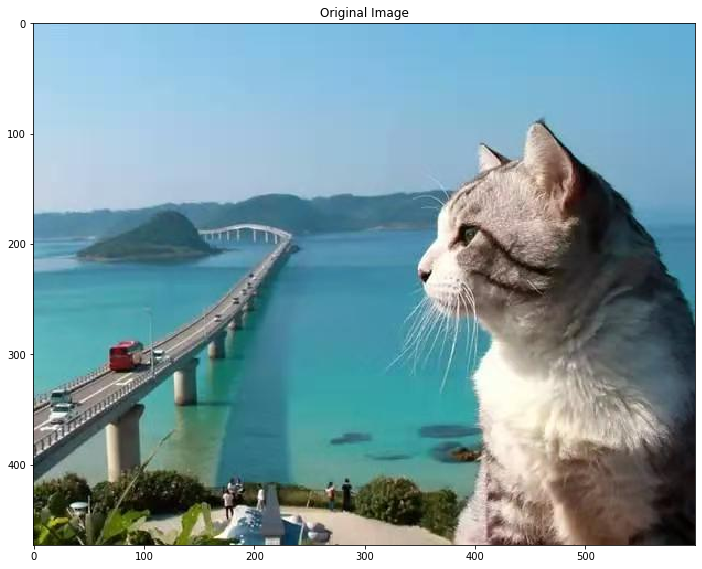

(<matplotlib.image.AxesImage at 0x22256aae908>,
 Text(0.5, 1, 'Original Image'),
 None)

In [3]:
img_src = cv2.imread('data/kitty.jpg')[..., ::-1]
plt.imshow(img_src), plt.title('Original Image'), plt.show()

# Utils

In [4]:
def show_spectrum_images(img_list, name_list):
    assert len(img_list) == len(name_list)
    len_img = len(img_list)
    for idx, (img, name) in enumerate(zip(img_list, name_list)):
        plt.subplot(1, len_img, idx+1), plt.imshow(np.log(1+np.abs(img)), "gray"), plt.title(name)
    plt.show()


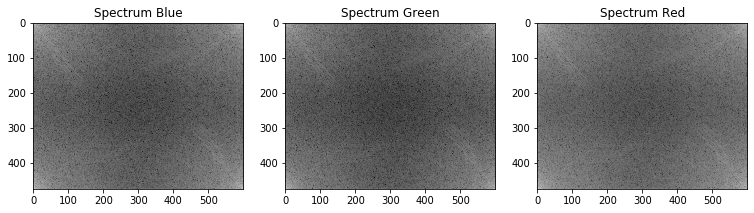

In [6]:
img_fft_list = [np.fft.fft2(img_src[..., i]) for i in range(3)]
show_spectrum_images(img_fft_list, ['Spectrum Blue', 
                                    'Spectrum Green', 
                                    'Spectrum Red'])

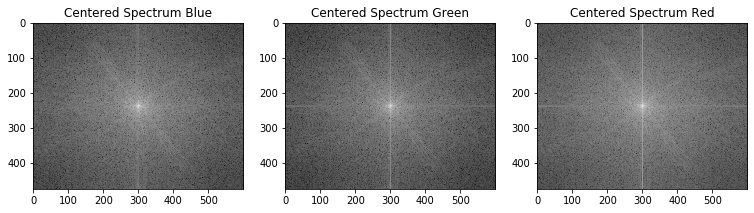

In [7]:
img_fft_center_list = [np.fft.fftshift(x) for x in img_fft_list]
show_spectrum_images(img_fft_center_list, ['Centered Spectrum Blue', 
                                           'Centered Spectrum Green', 
                                           'Centered Spectrum Red'])

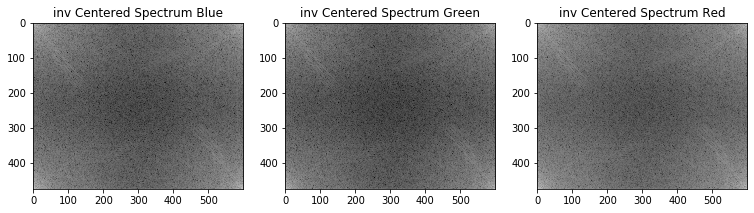

In [8]:
img_fft_inv_center_list = [np.fft.ifftshift(x) for x in img_fft_center_list]
show_spectrum_images(img_fft_inv_center_list, ['inv Centered Spectrum Blue', 
                                               'inv Centered Spectrum Green', 
                                               'inv Centered Spectrum Red'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


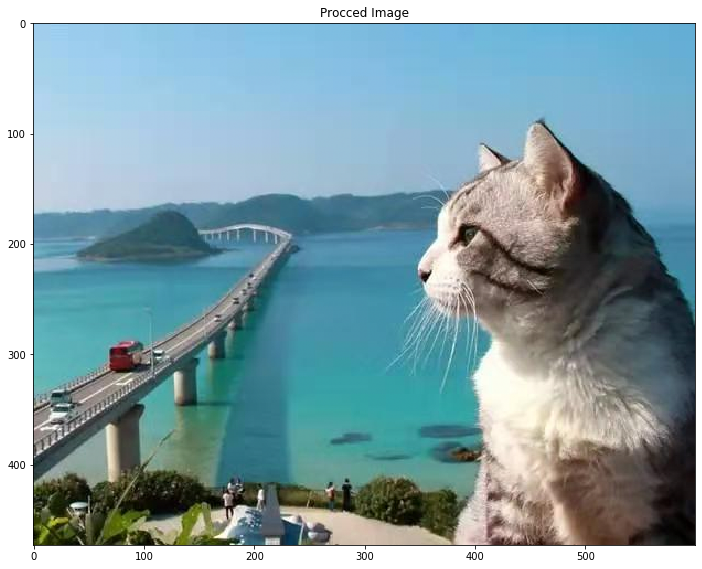

(<matplotlib.image.AxesImage at 0x222615ea5c8>,
 None,
 Text(0.5, 1, 'Procced Image'),
 None)

In [10]:
img_fft_inv_img_list = [np.fft.ifft2(x) for x in img_fft_inv_center_list]
img_proc = np.concatenate(np.expand_dims([np.abs(x) for x in img_fft_inv_img_list], axis=-1), axis=-1) / 255.
plt.imshow(img_proc), plt.title('Procced Image'), plt.show()

# Algorithms

In [11]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)


def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base


def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base


def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base


def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base


def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Circle distance of Fitler

In [13]:
CENTER_DISTANCE = 50

# Low Pass Filter (low frequency component)

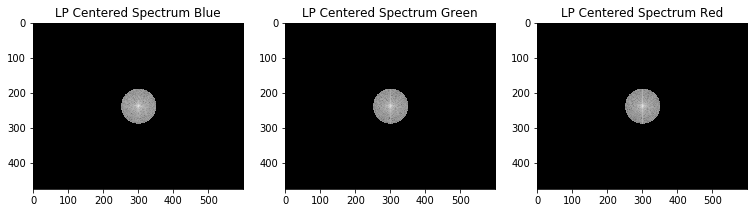

In [14]:
low_pass_center_list = [x * idealFilterLP(CENTER_DISTANCE, img_src.shape) for x in img_fft_center_list]
show_spectrum_images(low_pass_center_list, ['LP Centered Spectrum Blue', 
                                            'LP Centered Spectrum Green', 
                                            'LP Centered Spectrum Red'])

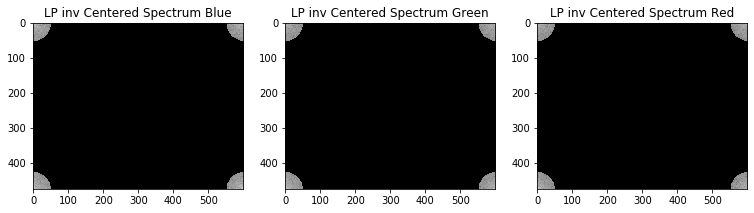

In [15]:
low_pass_inv_center_list = [np.fft.ifftshift(x) for x in low_pass_center_list]
show_spectrum_images(low_pass_inv_center_list, ['LP inv Centered Spectrum Blue', 
                                                'LP inv Centered Spectrum Green', 
                                                'LP inv Centered Spectrum Red'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


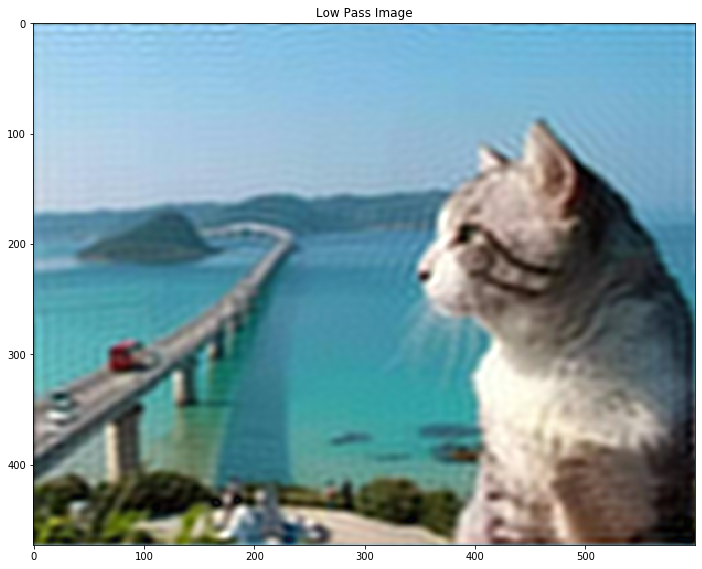

(<matplotlib.image.AxesImage at 0x222616d4f88>,
 Text(0.5, 1, 'Low Pass Image'),
 None)

In [17]:
img_low_pass_list = [np.fft.ifft2(x) for x in low_pass_inv_center_list]
img_low_pass = np.concatenate(np.expand_dims([np.abs(x) for x in img_low_pass_list], axis=-1), axis=-1) / 255.
plt.imshow(img_low_pass), plt.title('Low Pass Image'), plt.show()

# High Pass Filter (high frequency component)

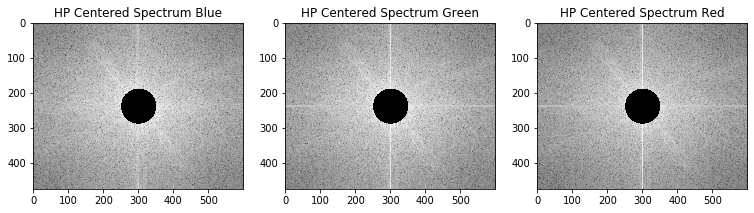

In [18]:
high_pass_center_list = [x * idealFilterHP(CENTER_DISTANCE, img_src.shape) for x in img_fft_center_list]
show_spectrum_images(high_pass_center_list, ['HP Centered Spectrum Blue', 
                                             'HP Centered Spectrum Green', 
                                             'HP Centered Spectrum Red'])

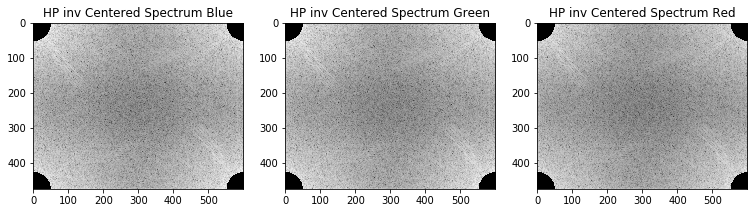

In [19]:
high_pass_inv_center_list = [np.fft.ifftshift(x) for x in high_pass_center_list]
show_spectrum_images(high_pass_inv_center_list, ['HP inv Centered Spectrum Blue', 
                                                 'HP inv Centered Spectrum Green', 
                                                 'HP inv Centered Spectrum Red'])

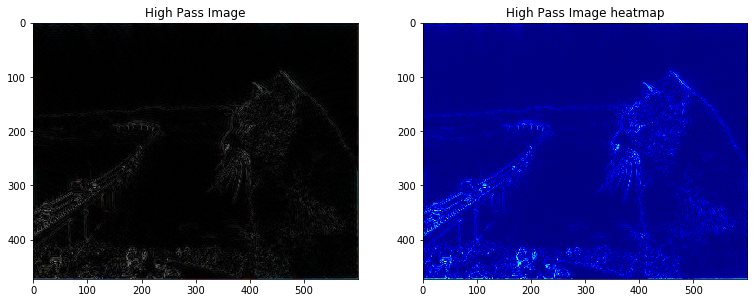

(<matplotlib.axes._subplots.AxesSubplot at 0x222651edb48>,
 Text(0.5, 1, 'High Pass Image heatmap'),
 None,
 None)

In [21]:
img_high_pass_list = [np.fft.ifft2(x) for x in high_pass_inv_center_list]
img_high_pass = np.concatenate(np.expand_dims([np.abs(x) for x in img_high_pass_list], axis=-1), axis=-1) / 255.
plt.subplot(121), plt.imshow(img_high_pass), plt.title('High Pass Image')
plt.subplot(122), plt.imshow(cv2.applyColorMap(np.uint8(img_high_pass*255), cv2.COLORMAP_JET)[..., ::-1]/255.), plt.title('High Pass Image heatmap'), plt.show()